# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=&q="
query = url + url + "appid=" + weather_api_key + city + "&q=" + "&units=imperial" 
weather = requests.get(url).json()


# set lists
city_list = []
cloud_list = []
date_l = []
humidity_list = []
lats_l = []
long_l = []
max_temps = []
wind_speeds = []
countries = []

# set counter
counter1 = 0
setcounter = 1

# for loops ro create df columns
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloud_list.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        date_l.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lats_l.append(response['coord']['lat'])
        long_l.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if counter1 > 50:
            counter = 1
            setcounter += 1
            city_list.append(city)
        else:
            counter1 += 1
            city_list.append(city)
        print(f"Processing Record {counter1} of Set {setcounter} | {city}")
    except:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------") 

Processing Record 1 of Set 1 | khani
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | waingapu
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | nouadhibou
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | lawton
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | sinnamary
Processing Record 15 of Set 1 | ribeira grande
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 | plettenberg bay
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | halifax
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | pangnirtung
Processing Record 23 of Set 1 | aklavik
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dictionary
weather_dict = {
    "City":city_list,
    "Cloudiness":cloud_list,
    "Country":countries,
    "Date":date_l,
    "Humidity":humidity_list,
    "Lat":lats_l,
    "Lng":long_l,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('weather_data.csv')
weather_df.to_csv("../starter_code/weather_data.csv")
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,khani,34,GE,1645511340,94,41.9563,42.9566,277.91,2.65
1,sao filipe,4,IN,1645511341,15,20.5113,76.2129,301.95,1.22
2,waingapu,100,ID,1645511341,76,-9.6567,120.2641,300.14,2.92
3,kapaa,75,US,1645511342,77,22.0752,-159.3190,295.33,4.63
4,chuy,29,UY,1645511342,91,-33.6971,-53.4616,291.25,2.88
...,...,...,...,...,...,...,...,...,...
550,nador,4,MA,1645511585,100,35.1740,-2.9287,283.29,0.00
551,naantali,75,FI,1645511585,80,60.4674,22.0243,270.38,4.12
552,ede,100,NL,1645511583,96,52.0333,5.6583,278.59,3.60
553,ribeira brava,0,ES,1645511586,83,42.7461,-8.4439,279.27,1.03


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

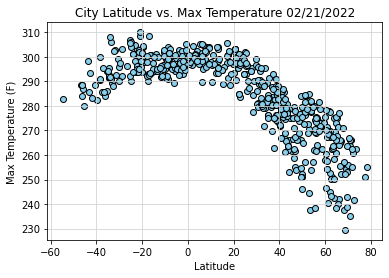

In [6]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature 02/21/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../starter_codefig1.png")
plt.show()

## Latitude vs. Humidity Plot

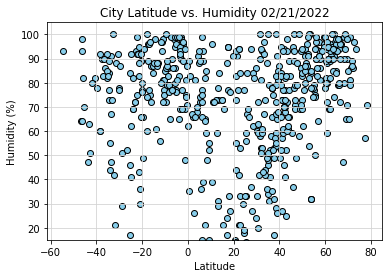

In [7]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity 02/21/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../starter_codefig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

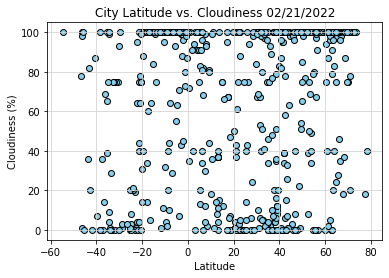

In [8]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness 02/21/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../starter_codefig3.png")
plt.show()


## Latitude vs. Wind Speed Plot

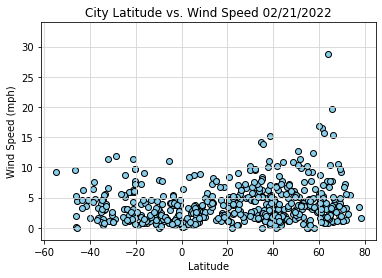

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed 02/21/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../starter_codefig1.png")
plt.show()

## Linear Regression

In [10]:
def makeLinRegression(df, x_Col, y_Col):
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], 
                                                           df[y_Col])
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept  
    
    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, 
                      title="{} vs. {} ({})"
                        .format(y_Col, x_Col, weather_df["Datetime (Local)"].iloc[0].split(",")[0])) 
    df_axes.plot(regr_line_x, regr_line_y, 'r')
   
    return df_axes 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression